<a href="https://colab.research.google.com/github/manishbhnau/Repo/blob/master/lda2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Reading Data**

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
uploaded=files.upload()

Saving Credit.csv to Credit (1).csv


In [ ]:
df=pd.read_csv("Credit.csv")

## **Encoding Categorical Values**

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
df=pd.read_csv("Credit.csv")
print (df.head(10))
col=df.columns.tolist()
print (col)
df["Ethnicity_code"]=lb_make.fit_transform(df["Ethnicity"])
df["Gender_code"]=lb_make.fit_transform(df["Gender"])
df[["Gender", "Gender_code", "Ethnicity", "Ethnicity_code", "Defaultee"]]

   Unnamed: 0   Income  Limit  ...         Ethnicity  Balance  Defaultee
0           1   14.891   3606  ...         Caucasian      333          0
1           2  106.025   6645  ...             Asian      903          0
2           3  104.593   7075  ...             Asian      580          0
3           4  148.924   9504  ...             Asian      964          0
4           5   55.882   4897  ...         Caucasian      331          0
5           6   80.180   8047  ...         Caucasian     1151          1
6           7   20.996   3388  ...  African American      203          0
7           8   71.408   7114  ...             Asian      872          0
8           9   15.125   3300  ...         Caucasian      279          0
9          10   71.061   6819  ...  African American     1350          1

[10 rows x 13 columns]
['Unnamed: 0', 'Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Gender', 'Student', 'Married', 'Ethnicity', 'Balance', 'Defaultee']


,Gender,Gender_code,Ethnicity,Ethnicity_code,Defaultee
0,Male,1,Caucasian,2,0
1,Female,0,Asian,1,0
2,Male,1,Asian,1,0
3,Female,0,Asian,1,0
4,Male,1,Caucasian,2,0
...,...,...,...,...,...
395,Male,1,Caucasian,2,0
396,Male,1,African American,0,0
397,Female,0,Caucasian,2,0
398,Male,1,Caucasian,2,0


In [ ]:
print (df[["Gender_code", "Ethnicity_code", "Income", "Limit"]].head(10))
print (df["Defaultee"][:10])

   Gender_code  Ethnicity_code   Income  Limit
0            1               2   14.891   3606
1            0               1  106.025   6645
2            1               1  104.593   7075
3            0               1  148.924   9504
4            1               2   55.882   4897
5            1               2   80.180   8047
6            0               0   20.996   3388
7            1               1   71.408   7114
8            0               2   15.125   3300
9            0               0   71.061   6819
0    0
1    0
2    0
3    0
4    0
5    1
6    0
7    0
8    0
9    1
Name: Defaultee, dtype: int64


## **Data for Training**

In [ ]:
X=df[["Gender_code", "Ethnicity_code", "Income", "Limit"]].values
y=df[["Defaultee"]].values
print (X.shape, y.shape)

(400, 4) (400, 1)


In [ ]:
print (X)

[[1.00000e+00 2.00000e+00 1.48910e+01 3.60600e+03]
 [0.00000e+00 1.00000e+00 1.06025e+02 6.64500e+03]
 [1.00000e+00 1.00000e+00 1.04593e+02 7.07500e+03]
 ...
 [0.00000e+00 2.00000e+00 5.78720e+01 4.17100e+03]
 [1.00000e+00 2.00000e+00 3.77280e+01 2.52500e+03]
 [0.00000e+00 1.00000e+00 1.87010e+01 5.52400e+03]]


# **LDA using python library**

In [ ]:
# evaluate a lda model on the dataset
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# define dataset
X, y = make_classification(n_samples=400, n_features=4, n_informative=4, n_redundant=0, random_state=1)
# define model
model = LinearDiscriminantAnalysis()
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.732 (0.076)


# **Prediction/Classification**

In [ ]:
model.fit(X, y)
pred=model.predict(X[:4])
print (pred)

[1 1 0 0]


## **Transformation/Reduction**

In [ ]:
model.transform(X[:4])

array([[ 1.30084735],
       [ 1.86800075],
       [-1.2910339 ],
       [-0.80437144]])

## **Get params**

In [ ]:
model.get_params(deep=True)

{'n_components': None,
 'priors': None,
 'shrinkage': None,
 'solver': 'svd',
 'store_covariance': False,
 'tol': 0.0001}

## **Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, model.predict(X))

array([[146,  54],
       [ 49, 151]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y, model.predict(X)))

              precision    recall  f1-score   support

           0       0.75      0.73      0.74       200
           1       0.74      0.76      0.75       200

    accuracy                           0.74       400
   macro avg       0.74      0.74      0.74       400
weighted avg       0.74      0.74      0.74       400



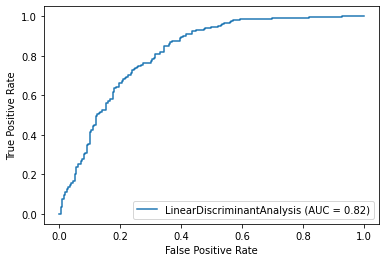

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics
metrics.plot_roc_curve(model, X, y)

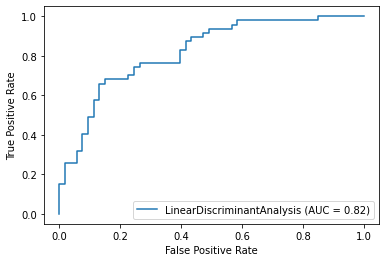

In [ ]:
metrics.plot_roc_curve(model, X[:100], y[:100])

In [ ]:
print (X)

[[ 0.69173463  1.25882235  0.4580021  -0.7425501 ]
 [ 1.99023703  0.50798523 -3.22170468  0.97782796]
 [-1.40980432 -0.38537822  1.14107737  1.53415142]
 ...
 [ 1.75826178  0.52317117 -0.0696271   0.46357594]
 [ 0.648422    1.70683104  0.36587179  1.09632248]
 [-2.07666473  1.33910646  2.50498592 -0.33860819]]
